# Lesson 1 - What's your pet

In [1]:
%reload_ext autoreload
%autoreload 2
%matplotlib inline

In [2]:
from fastai.vision import *
from fastai.metrics import error_rate

In [3]:
# the batch size parameter

batch_size = 64
# batch_size = 16   # uncomment this line if you run out of memory even after clicking Kernel->Restart

## Looking at the data

We are going to use the [Oxford-IIIT Pet Dataset](http://www.robots.ox.ac.uk/~vgg/data/pets/) by [O. M. Parkhi et al., 2012](http://www.robots.ox.ac.uk/~vgg/publications/2012/parkhi12a/parkhi12a.pdf) GOOD READ which features 12 cat breeds and 25 dogs breeds. Our model will need to learn to differentiate between these 37 distinct categories. According to their paper, the best accuracy they could get in 2012 was 59.21%, using a complex model that was specific to pet detection, with separate "Image", "Head", and "Body" models for the pet photos. Let's see how accurate we can be using deep learning!

We are going to use the `untar_data` function to which we must pass a URL as an argument and which will download and extract the data.

In [4]:
# https://docs.fast.ai/datasets.html#untar_data

# datasets product

untar_data

<function fastai.datasets.untar_data(url: str, fname: Union[pathlib.Path, str] = None, dest: Union[pathlib.Path, str] = None, data=True, force_download=False) -> pathlib.Path>

In [5]:
URLs, URLs.PETS

(fastai.datasets.URLs,
 'https://s3.amazonaws.com/fast-ai-imageclas/oxford-iiit-pet')

In [6]:
# download and untar

dataset_path = untar_data(URLs.PETS); dataset_path

WindowsPath('C:/Users/Milind Dalvi/.fastai/data/oxford-iiit-pet')

In [7]:
dataset_path.ls()

[WindowsPath('C:/Users/Milind Dalvi/.fastai/data/oxford-iiit-pet/annotations'),
 WindowsPath('C:/Users/Milind Dalvi/.fastai/data/oxford-iiit-pet/images')]

In [8]:
# shortcut to sneak peek inside, images and annotations

dataset_path_images = dataset_path/'images'
dataset_path_annotations = dataset_path/'annotations'

In [9]:
# vision product

get_image_files

<function fastai.vision.data.get_image_files(c: Union[pathlib.Path, str], check_ext: bool = True, recurse=False) -> Collection[pathlib.Path]>

In [10]:
# checking files insides images

image_filenames = get_image_files(dataset_path_images)
image_filenames[:5]

[WindowsPath('C:/Users/Milind Dalvi/.fastai/data/oxford-iiit-pet/images/Abyssinian_1.jpg'),
 WindowsPath('C:/Users/Milind Dalvi/.fastai/data/oxford-iiit-pet/images/Abyssinian_10.jpg'),
 WindowsPath('C:/Users/Milind Dalvi/.fastai/data/oxford-iiit-pet/images/Abyssinian_100.jpg'),
 WindowsPath('C:/Users/Milind Dalvi/.fastai/data/oxford-iiit-pet/images/Abyssinian_101.jpg'),
 WindowsPath('C:/Users/Milind Dalvi/.fastai/data/oxford-iiit-pet/images/Abyssinian_102.jpg')]

In [21]:
# checking for anything inside annotations

get_image_files(dataset_path_annotations)

[]

In [29]:
np.random.seed(2)
regex_pattern = r'/([^/]+)_\d+.jpg$'

### Explaining ImageDataBunch

In [1]:
from fastai.utils.show_install import *
show_install()



```text
=== Software === 
python        : 3.7.3
fastai        : 1.0.57
fastprogress  : 0.1.21
torch         : 1.2.0
nvidia driver : 435.21
torch cuda    : 10.0.130 / is available
torch cudnn   : 7602 / is enabled

=== Hardware === 
nvidia gpus   : 1
torch devices : 1
  - gpu0      : 11441MB | Tesla K80

=== Environment === 
platform      : Linux-4.15.0-1048-aws-x86_64-with-debian-buster-sid
distro        : #50-Ubuntu SMP Wed Sep 4 22:03:52 UTC 2019
conda env     : base
python        : /home/ubuntu/anaconda3/bin/python
sys.path      : /home/ubuntu/fast-ai-lessons/course-v3/nbs/dl1
/home/ubuntu/anaconda3/lib/python37.zip
/home/ubuntu/anaconda3/lib/python3.7
/home/ubuntu/anaconda3/lib/python3.7/lib-dynload

/home/ubuntu/.local/lib/python3.7/site-packages
/home/ubuntu/anaconda3/lib/python3.7/site-packages
/home/ubuntu/anaconda3/lib/python3.7/site-packages/IPython/extensions
/home/ubuntu/.ipython
```

Please make sure to include opening/closing ``` when you paste into forums/github to mak

In [24]:
# vision product

ImageDataBunch

fastai.vision.data.ImageDataBunch

In [32]:
# https://docs.fast.ai/vision.data.html#ImageDataBunch.from_name_re

# ds_tfms : the transformations you want to apply to the images, flip, scale etc....
get_transforms

<function fastai.vision.transform.get_transforms(do_flip: bool = True, flip_vert: bool = False, max_rotate: float = 10.0, max_zoom: float = 1.1, max_lighting: float = 0.2, max_warp: float = 0.2, p_affine: float = 0.75, p_lighting: float = 0.75, xtra_tfms: Union[Collection[fastai.vision.image.Transform], NoneType] = None) -> Collection[fastai.vision.image.Transform]>

In [35]:
# size: target size of our picture in pixels

# In the fast.ai library we have imagenet_stats, cifar_stats and mnist_stats so we can add normalization easily with any of these datasets.
imagenet_stats

([0.485, 0.456, 0.406], [0.229, 0.224, 0.225])

In [39]:
# VI: To determine the sampling strategy for picking exact images, dive into following url's
# 1) https://docs.fast.ai/vision.data.html#ImageDataBunch
# 2) https://pytorch.org/docs/stable/data.html#torch.utils.data.DataLoader
# 3) https://pytorch.org/docs/stable/data.html#torch.utils.data.SubsetRandomSampler

dataset = ImageDataBunch.from_name_re(dataset_path_images, image_filenames, regex_pattern, ds_tfms=get_transforms(), size=224, bs=batch_size).normalize(imagenet_stats)

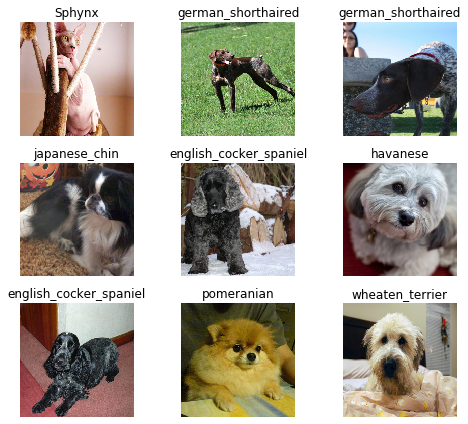

In [45]:
# https://docs.fast.ai/basic_data.html#DataBunch.show_batch

dataset.show_batch(rows=3, figsize=(7,6))

In [47]:
print(dataset.classes)

['Abyssinian', 'Bengal', 'Birman', 'Bombay', 'British_Shorthair', 'Egyptian_Mau', 'Maine_Coon', 'Persian', 'Ragdoll', 'Russian_Blue', 'Siamese', 'Sphynx', 'american_bulldog', 'american_pit_bull_terrier', 'basset_hound', 'beagle', 'boxer', 'chihuahua', 'english_cocker_spaniel', 'english_setter', 'german_shorthaired', 'great_pyrenees', 'havanese', 'japanese_chin', 'keeshond', 'leonberger', 'miniature_pinscher', 'newfoundland', 'pomeranian', 'pug', 'saint_bernard', 'samoyed', 'scottish_terrier', 'shiba_inu', 'staffordshire_bull_terrier', 'wheaten_terrier', 'yorkshire_terrier']


In [49]:
# https://github.com/fastai/fastai/blob/master/fastai/vision/data.py#L263

print(dataset.c)

37


## Training: resnet34

Now we will start training our model. We will use a [convolutional neural network](http://cs231n.github.io/convolutional-networks/) GOOD READ backbone and a fully connected head with a single hidden layer as a classifier. Don't know what these things mean? Not to worry, we will dive deeper in the coming lessons. For the moment you need to know that we are building a model which will take images as input and will output the predicted probability for each of the categories (in this case, it will have 37 outputs).

We will train for 4 epochs (4 cycles through all our data).

In [51]:
# vision product

cnn_learner

<function fastai.vision.learner.cnn_learner(data: fastai.basic_data.DataBunch, base_arch: Callable, cut: Union[int, Callable] = None, pretrained: bool = True, lin_ftrs: Union[Collection[int], NoneType] = None, ps: Union[float, Collection[float]] = 0.5, custom_head: Union[torch.nn.modules.module.Module, NoneType] = None, split_on: Union[Callable, Collection[Collection[torch.nn.modules.module.Module]], NoneType] = None, bn_final: bool = False, init=<function kaiming_normal_ at 0x7f16a7852730>, concat_pool: bool = True, **kwargs: Any) -> fastai.basic_train.Learner>

In [54]:
# vision product

models

<module 'fastai.vision.models' from '/home/ubuntu/anaconda3/lib/python3.7/site-packages/fastai/vision/models/__init__.py'>

In [56]:
# metrics product

error_rate

<function fastai.metrics.error_rate(input: torch.Tensor, targs: torch.Tensor) -> <function NewType.<locals>.new_type at 0x7f1708047ea0>>

In [57]:
learn = cnn_learner(dataset, models.resnet34, metrics=error_rate)

In [58]:
learn.model

Sequential(
  (0): Sequential(
    (0): Conv2d(3, 64, kernel_size=(7, 7), stride=(2, 2), padding=(3, 3), bias=False)
    (1): BatchNorm2d(64, eps=1e-05, momentum=0.1, affine=True, track_running_stats=True)
    (2): ReLU(inplace=True)
    (3): MaxPool2d(kernel_size=3, stride=2, padding=1, dilation=1, ceil_mode=False)
    (4): Sequential(
      (0): BasicBlock(
        (conv1): Conv2d(64, 64, kernel_size=(3, 3), stride=(1, 1), padding=(1, 1), bias=False)
        (bn1): BatchNorm2d(64, eps=1e-05, momentum=0.1, affine=True, track_running_stats=True)
        (relu): ReLU(inplace=True)
        (conv2): Conv2d(64, 64, kernel_size=(3, 3), stride=(1, 1), padding=(1, 1), bias=False)
        (bn2): BatchNorm2d(64, eps=1e-05, momentum=0.1, affine=True, track_running_stats=True)
      )
      (1): BasicBlock(
        (conv1): Conv2d(64, 64, kernel_size=(3, 3), stride=(1, 1), padding=(1, 1), bias=False)
        (bn1): BatchNorm2d(64, eps=1e-05, momentum=0.1, affine=True, track_running_stats=True)
  

In [62]:
# More read on one cycle policy @https://sgugger.github.io/the-1cycle-policy.html
help(learn.fit_one_cycle)

Help on method fit_one_cycle in module fastai.train:

fit_one_cycle(cyc_len: int, max_lr: Union[float, Collection[float], slice] = slice(None, 0.003, None), moms: Tuple[float, float] = (0.95, 0.85), div_factor: float = 25.0, pct_start: float = 0.3, final_div: float = None, wd: float = None, callbacks: Union[Collection[fastai.callback.Callback], NoneType] = None, tot_epochs: int = None, start_epoch: int = None) -> None method of fastai.basic_train.Learner instance
    Fit a model following the 1cycle policy.



In [63]:
learn.fit_one_cycle(4)

epoch,train_loss,valid_loss,error_rate,time
0,1.413046,0.314205,0.103518,01:12
1,0.634857,0.290117,0.094046,01:04
2,0.389427,0.250058,0.081867,01:03
3,0.276398,0.242842,0.078484,01:04


In [65]:
# https://docs.fast.ai/basic_train.html#Saving-and-loading-models

help(learn.save)

Help on method save in module fastai.basic_train:

save(file: Union[pathlib.Path, str, _io.BufferedWriter, _io.BytesIO] = None, return_path: bool = False, with_opt: bool = True) method of fastai.basic_train.Learner instance
    Save model and optimizer state (if `with_opt`) with `file` to `self.model_dir`. `file` can be file-like (file or buffer)



In [67]:
learn.save('stage-1', return_path=True)

PosixPath('/home/ubuntu/.fastai/data/oxford-iiit-pet/images/models/stage-1.pth')

## Results

In [70]:
# train product

ClassificationInterpretation

fastai.train.ClassificationInterpretation

In [75]:
# learn consist of two things, the dataset itself and the trained model

interp = ClassificationInterpretation.from_learner(learn)

In [76]:
help(interp.top_losses)

Help on method top_losses in module fastai.train:

top_losses(k: int = None, largest=True) method of fastai.train.ClassificationInterpretation instance
    `k` largest(/smallest) losses and indexes, defaulting to all losses (sorted by `largest`).



In [78]:
# https://docs.fast.ai/train.html#Interpretation.top_losses

losses, idxs = interp.top_losses()

assert(len(dataset.valid_ds)==len(losses)==len(idxs)), "observed some discrepancy!"

In [80]:
help(interp.plot_top_losses)

Help on method _cl_int_plot_top_losses in module fastai.vision.learner:

_cl_int_plot_top_losses(k, largest=True, figsize=(12, 12), heatmap: bool = False, heatmap_thresh: int = 16, return_fig: bool = None) -> Union[matplotlib.figure.Figure, NoneType] method of fastai.train.ClassificationInterpretation instance
    Show images in `top_losses` along with their prediction, actual, loss, and probability of actual class.



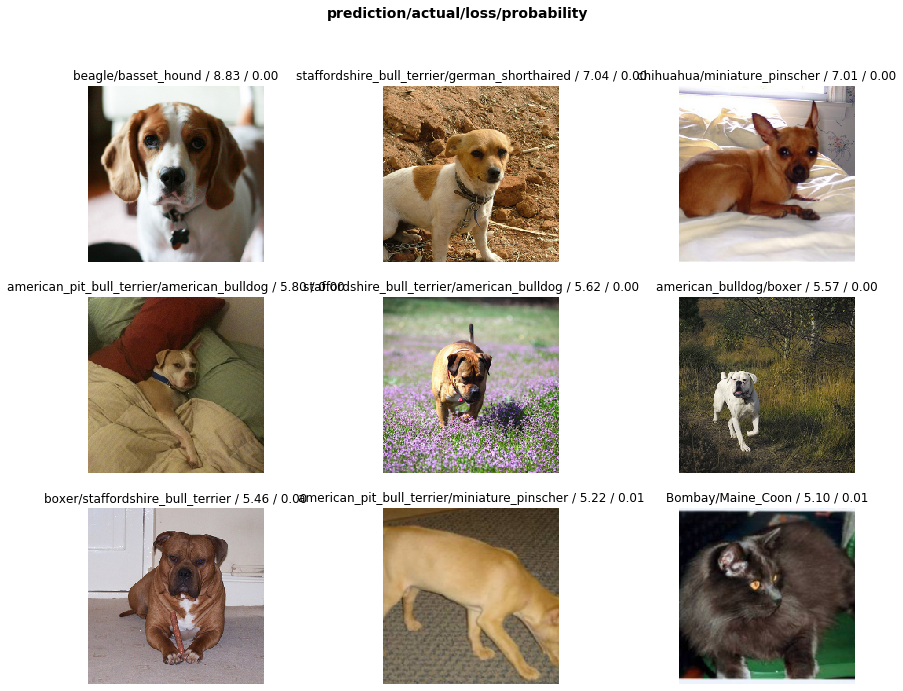

In [81]:
# https://docs.fast.ai/vision.learner.html#_cl_int_plot_top_losses

interp.plot_top_losses(9, figsize=(15,11))

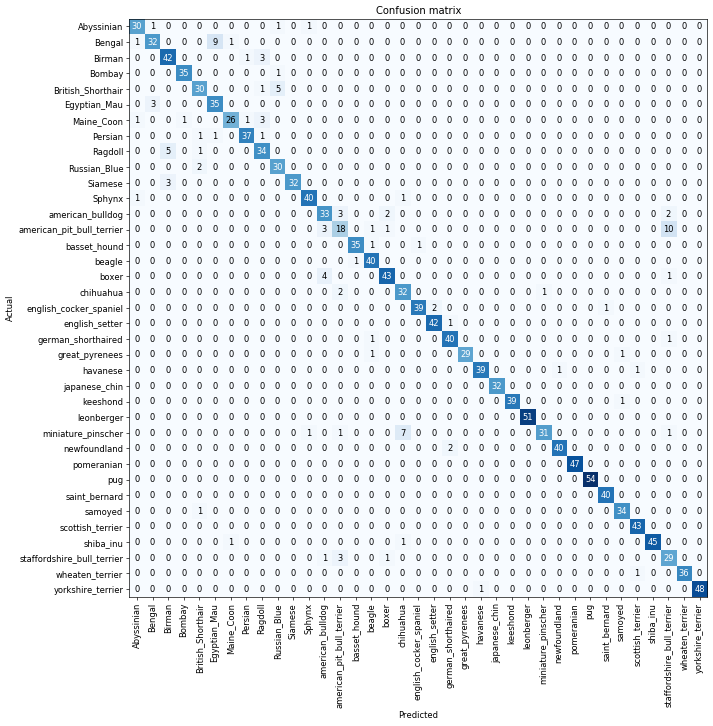

In [84]:
# https://docs.fast.ai/train.html#ClassificationInterpretation.plot_confusion_matrix

interp.plot_confusion_matrix(figsize=(12,12), dpi=60)

In [87]:
# https://docs.fast.ai/train.html#ClassificationInterpretation.most_confused

interp.most_confused(min_val=2)

[('american_pit_bull_terrier', 'staffordshire_bull_terrier', 10),
 ('Bengal', 'Egyptian_Mau', 9),
 ('miniature_pinscher', 'chihuahua', 7),
 ('British_Shorthair', 'Russian_Blue', 5),
 ('Ragdoll', 'Birman', 5),
 ('boxer', 'american_bulldog', 4),
 ('Birman', 'Ragdoll', 3),
 ('Egyptian_Mau', 'Bengal', 3),
 ('Maine_Coon', 'Ragdoll', 3),
 ('Siamese', 'Birman', 3),
 ('american_bulldog', 'american_pit_bull_terrier', 3),
 ('american_pit_bull_terrier', 'american_bulldog', 3),
 ('staffordshire_bull_terrier', 'american_pit_bull_terrier', 3),
 ('Russian_Blue', 'British_Shorthair', 2),
 ('american_bulldog', 'boxer', 2),
 ('american_bulldog', 'staffordshire_bull_terrier', 2),
 ('chihuahua', 'american_pit_bull_terrier', 2),
 ('english_cocker_spaniel', 'english_setter', 2),
 ('newfoundland', 'german_shorthaired', 2)]

## Unfreezing, fine-tuning, and learning rates (Based of above activity let's try to improve the model)

Since our model is working as we expect it to, we will *unfreeze* our model and train some more.

In [89]:
# This is a part of discriminative layer training found @https://docs.fast.ai/basic_train.html#Learner.unfreeze

learn.unfreeze()

In [90]:
# do one more cycle on existing recently trained model 

learn.fit_one_cycle(1)

epoch,train_loss,valid_loss,error_rate,time
0,0.645736,0.399903,0.120433,01:09


In [91]:
# re-load the model from its previous checkpoint

learn.load('stage-1');

In [93]:
# https://docs.fast.ai/train.html#lr_find

learn.lr_find()

LR Finder is complete, type {learner_name}.recorder.plot() to see the graph.


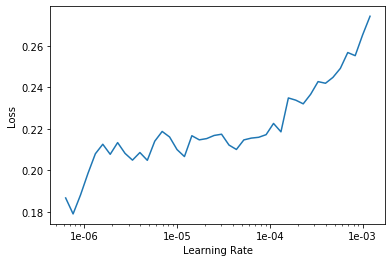

In [94]:
learn.recorder.plot()

In [95]:
learn.unfreeze()
learn.fit_one_cycle(2, max_lr=slice(1e-7, 1e-4))

epoch,train_loss,valid_loss,error_rate,time
0,0.227506,0.236206,0.075101,01:08
1,0.233320,0.237229,0.071719,01:08


That's a pretty accurate model!

## Training: resnet50

Now we will train in the same way as before but with one caveat: instead of using resnet34 as our backbone we will use resnet50 (resnet34 is a 34 layer residual network while resnet50 has 50 layers. It will be explained later in the course and you can learn the details in the [resnet paper](https://arxiv.org/pdf/1512.03385.pdf)).

Basically, resnet50 usually performs better because it is a deeper network with more parameters. Let's see if we can achieve a higher performance here. To help it along, let's us use larger images too, since that way the network can see more detail. We reduce the batch size a bit since otherwise this larger network will require more GPU memory.

In [ ]:
dataset = ImageDataBunch.from_name_re(dataset_path_images, fnames, pat, ds_tfms=get_transforms(), size=299, bs=bs//2).normalize(imagenet_stats)

In [ ]:
learn = cnn_learner(data, models.resnet50, metrics=error_rate)

LR Finder complete, type {learner_name}.recorder.plot() to see the graph.


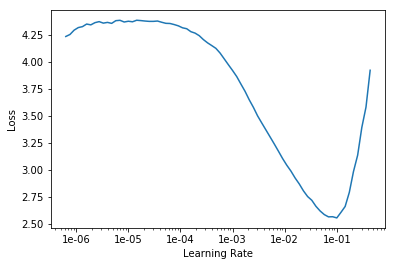

In [ ]:
learn.lr_find()
learn.recorder.plot()

In [ ]:
learn.fit_one_cycle(8)

Total time: 06:59
epoch  train_loss  valid_loss  error_rate
1      0.548006    0.268912    0.076455    (00:57)
2      0.365533    0.193667    0.064953    (00:51)
3      0.336032    0.211020    0.073072    (00:51)
4      0.263173    0.212025    0.060893    (00:51)
5      0.217016    0.183195    0.063599    (00:51)
6      0.161002    0.167274    0.048038    (00:51)
7      0.086668    0.143490    0.044655    (00:51)
8      0.082288    0.154927    0.046008    (00:51)



In [ ]:
learn.save('stage-1-50')

It's astonishing that it's possible to recognize pet breeds so accurately! Let's see if full fine-tuning helps:

In [ ]:
learn.unfreeze()
learn.fit_one_cycle(3, max_lr=slice(1e-6,1e-4))

Total time: 03:27
epoch  train_loss  valid_loss  error_rate
1      0.097319    0.155017    0.048038    (01:10)
2      0.074885    0.144853    0.044655    (01:08)
3      0.063509    0.144917    0.043978    (01:08)



If it doesn't, you can always go back to your previous model.

In [ ]:
learn.load('stage-1-50');

In [ ]:
interp = ClassificationInterpretation.from_learner(learn)

In [ ]:
interp.most_confused(min_val=2)

[('american_pit_bull_terrier', 'staffordshire_bull_terrier', 6),
 ('Bengal', 'Egyptian_Mau', 5),
 ('Bengal', 'Abyssinian', 4),
 ('boxer', 'american_bulldog', 4),
 ('Ragdoll', 'Birman', 4),
 ('Egyptian_Mau', 'Bengal', 3)]

## Other data formats

In [ ]:
path = untar_data(URLs.MNIST_SAMPLE); path

PosixPath('/home/ubuntu/course-v3/nbs/dl1/data/mnist_sample')

In [ ]:
tfms = get_transforms(do_flip=False)
data = ImageDataBunch.from_folder(path, ds_tfms=tfms, size=26)

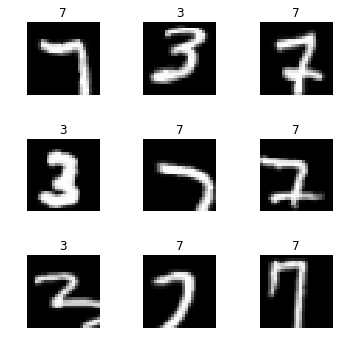

In [ ]:
data.show_batch(rows=3, figsize=(5,5))

In [ ]:
learn = cnn_learner(data, models.resnet18, metrics=accuracy)
learn.fit(2)

Total time: 00:23
epoch  train_loss  valid_loss  accuracy
1      0.116117    0.029745    0.991168  (00:12)
2      0.056860    0.015974    0.994603  (00:10)



In [ ]:
df = pd.read_csv(path/'labels.csv')
df.head()

,name,label
0,train/3/7463.png,0
1,train/3/21102.png,0
2,train/3/31559.png,0
3,train/3/46882.png,0
4,train/3/26209.png,0


In [ ]:
data = ImageDataBunch.from_csv(path, ds_tfms=tfms, size=28)

[0, 1]

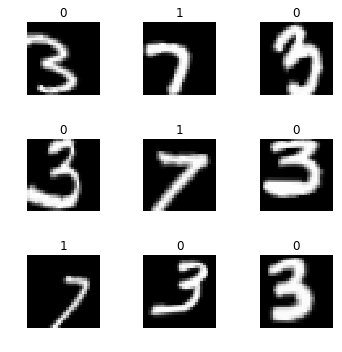

In [ ]:
data.show_batch(rows=3, figsize=(5,5))
data.classes

In [ ]:
data = ImageDataBunch.from_df(path, df, ds_tfms=tfms, size=24)
data.classes

[0, 1]

In [ ]:
fn_paths = [path/name for name in df['name']]; fn_paths[:2]

[PosixPath('/home/ubuntu/course-v3/nbs/dl1/data/mnist_sample/train/3/7463.png'),
 PosixPath('/home/ubuntu/course-v3/nbs/dl1/data/mnist_sample/train/3/21102.png')]

In [ ]:
pat = r"/(\d)/\d+\.png$"
data = ImageDataBunch.from_name_re(path, fn_paths, pat=pat, ds_tfms=tfms, size=24)
data.classes

['3', '7']

In [ ]:
data = ImageDataBunch.from_name_func(path, fn_paths, ds_tfms=tfms, size=24,
        label_func = lambda x: '3' if '/3/' in str(x) else '7')
data.classes

['3', '7']

In [ ]:
labels = [('3' if '/3/' in str(x) else '7') for x in fn_paths]
labels[:5]

['3', '3', '3', '3', '3']

In [ ]:
data = ImageDataBunch.from_lists(path, fn_paths, labels=labels, ds_tfms=tfms, size=24)
data.classes

['3', '7']